In [35]:
import pandas as pd
import numpy as np
from pandas import DataFrame, Series
import sklearn
import mglearn
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
%matplotlib notebook

In [36]:
rnd = np.random.RandomState(0)
X_org = rnd.normal(size=(1000, 3))
w = rnd.normal(size=3)
X = rnd.poisson(10*np.exp(X_org))
y = np.dot(X_org, w)

In [37]:
w.shape

(3,)

In [38]:
print("Number of feature apperance: \n {}".format(np.bincount(X[:, 0])))

Number of feature apperance: 
 [28 38 68 48 61 59 45 56 37 40 35 34 36 26 23 26 27 21 23 23 18 21 10  9 17
  9  7 14 12  7  3  8  4  5  5  3  4  2  4  1  1  3  2  5  3  8  2  5  2  1
  2  3  3  2  2  3  3  0  1  2  1  0  0  3  1  0  0  0  1  3  0  1  0  2  0
  1  1  0  0  0  0  1  0  0  2  2  0  1  1  0  0  0  0  1  1  0  0  0  0  0
  0  0  1  0  0  0  0  0  1  1  0  0  1  0  0  0  0  0  0  0  1  0  0  0  0
  1  0  0  0  0  0  0  0  0  0  0  0  0  0  0  1]


In [39]:
X[:, 0]

array([ 56,  81,  25,  20,  27,  18,  12,  21, 109,   7,  15,   1,  27,
         4,   1,   7,   2,  11,   6,  18,   1,   2,   2,   7,  31,   7,
         7,  28,  37,   9,   8,  21,   7,  20,   3,  71,  69,  27,   9,
         7,  12,  43,   9,  18,   4,  21,  16,  12, 120,  33,   9,   6,
        30,   7,  25,  27,  40,  15,   2,   5,   7,   3,   5,  42,  10,
         7,  87,   5,  19,   4,  24,   8,  10,  11,   2,   9,   2,   7,
         1,   0,   4,   8,  32,   2,  11,  16,   2,   5,   1,   8,  13,
        19,  13,  68,   2,  21,  20,  12,  10,  16,   5,   7,   1,   3,
         1,   9,  10,   3,   4, 112,  26,   3,   3,  45,   7,  11,  18,
         2,   4,   3,  11,  13,  10,   2,  28,  10,   8,  14,  14,   3,
        23,   3,  24,  28,  18,  17,  13,  27,  56,  10,  23,  11,  24,
         5,  34,  13,  28,   0,  32,   5,   1,  12,   6,  14,   8,  84,
         1,   5,  45,   1,  22,   9,  47,  14,  29,   9,   2,   9,  10,
         1,  25,   2,  17,  60,   0,   6,   0,  12,   0,  10,  1

In [40]:
X.shape, y.shape

((1000, 3), (1000,))

<IPython.core.display.Javascript object>


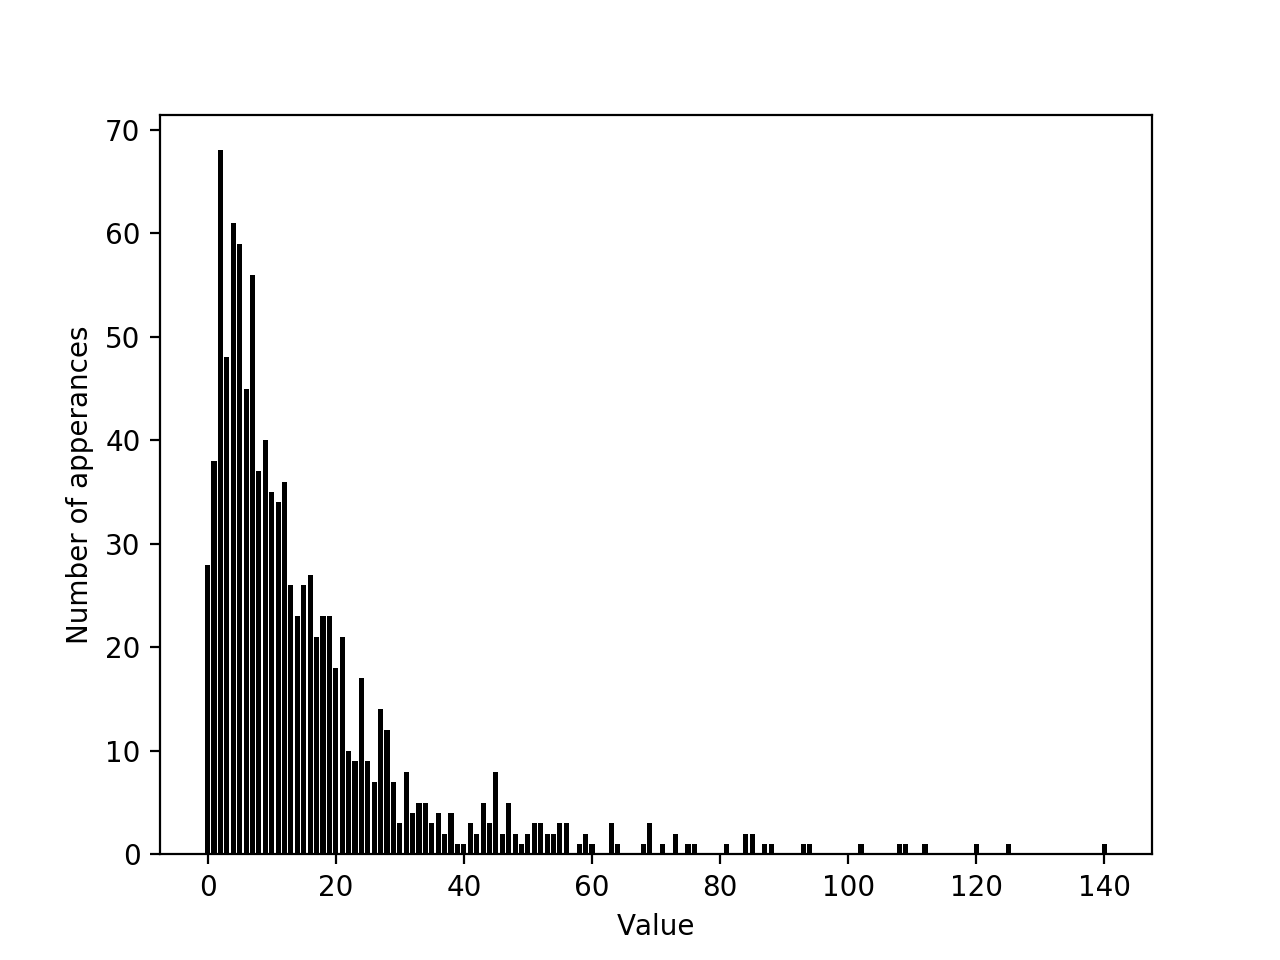

Text(0,0.5,'Number of apperances')

In [41]:
bins = np.bincount(X[:, 0])
fig, ax = plt.subplots()
ax.bar(np.arange(len(bins)), bins, color="k")
ax.set_xlabel("Value")
ax.set_ylabel("Number of apperances")

In [42]:
X_train, X_test, y_train, y_test = train_test_split(X, y)

In [43]:
from sklearn.linear_model import Ridge
score = Ridge().fit(X_train, y_train).score(X_test, y_test)
print("Score without log: {:.3f}".format(score))

Score without log: 0.679


In [44]:
X_train_log, X_test_log = np.log(X_train+1), np.log(X_test+1)

In [45]:
score = Ridge().fit(X_train_log, y_train).score(X_test_log, y_test)
print("Score with log: {:.3f}".format(score))

Score with log: 0.861


<IPython.core.display.Javascript object>


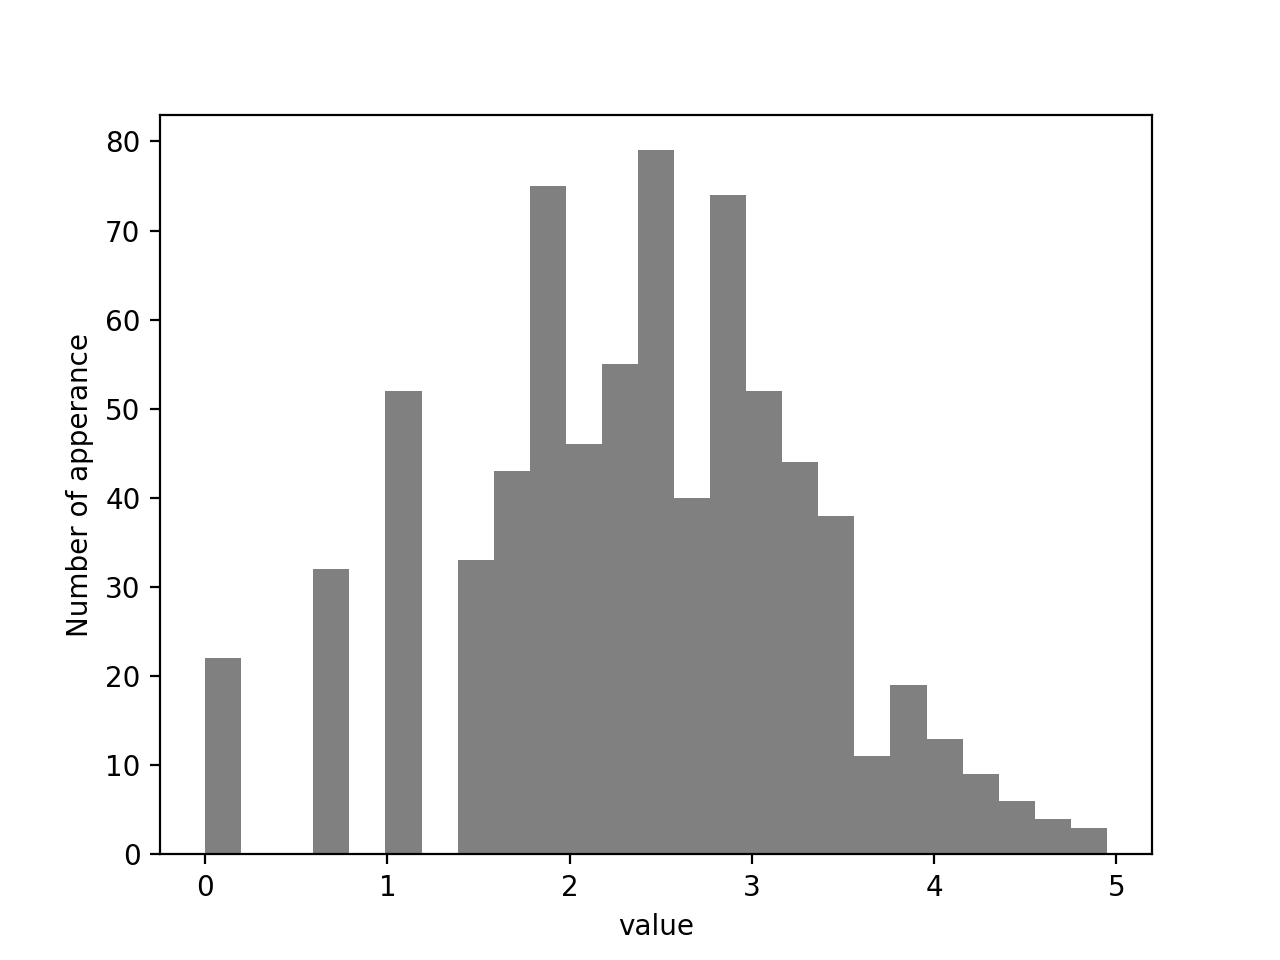

Text(0.5,0,'value')

In [46]:
fig, ax = plt.subplots()
ax.hist(X_train_log[:, 0], bins=25, color='gray')
ax.set_ylabel("Number of apperance")
ax.set_xlabel("value")